In [1]:
import gc
import math
import itertools

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

import scipy.stats as st
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion

from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth, DBSCAN, OPTICS

import helpers as hp
import clustering as cl
import display as dp
import importlib #importlib.reload(foo)

In [2]:
MDIR = '/sanssauvegarde/homes/v18porti/info/'

In [10]:
df_ALL = pd.read_feather(MDIR + '550_32.feather')
print(df_ALL.shape)
df_ALL.info()

(120128063, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120128063 entries, 0 to 120128062
Data columns (total 4 columns):
vectorRRKLD_ALL       float32
vectorFAmpKLD_ALL     float32
vectorUFAmpKLD_ALL    float32
vectorCorrKLD_ALL     float32
dtypes: float32(4)
memory usage: 1.8 GB


In [11]:
importlib.reload(cl)

<module 'clustering' from '/homes/v18porti/Documents/code/imt_stg/clustering.py'>

In [12]:
df_DIV, indexes = hp.getRandomRows(df_ALL, 0.22)
#del df_ALL; gc.collect();
printPCA = False
print(f'\n------------- shape: { df_DIV.shape } -----------------\n ')

df_DIV = cl.cleanData(df_DIV, 'mean')

#df_nout, Xnorm, Xpca, dfPca, titPca, pca, std, indexes2 = cl.runOutNormPCAV2(df_DIV, indexes, threshold=20, threshold_hard=0.01, cols_hard=[0,2])
#df_nout, Xnorm, std, indexes2 = cl.runOutNorm(df_DIV, indexes)
df_nout, Xnorm, std, indexes2 = cl.runOutNormV2(df_DIV, indexes)

if printPCA: dp.printPCAScatter(df_nout, ['vectorRRKLD', 'vectorFAmpKLD', 'vectorUFAmpKLD', 'vectorCorrKLD'])
del  df_nout; gc.collect();


------------- shape: (26428173, 4) -----------------
 
bandwidth: 78248314691797.27
number of estimated clusters : 1469
shapes: (26428173,), (26428173, 4)
shapes: (26425530,), (26425530, 4)
tomain [ True  True  True ...  True  True  True]
after hard removal (vectorUFAmpKLD && vectorRRKLD) shape : (25934950, 4) && 98.13
after soft removal (vectorCorrKLD && vectorFAmpKLD) shape : (26425530, 4) && 99.99


In [ ]:
gmm = GaussianMixture(n_components=8, covariance_type='full').fit(Xnorm)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue', 'darkorange', 'gold', 'tomato', 
                              'crimson', 'darkslategray', 'springgreen', 'chocolate'])
dp.printPCAGMM(gmm, Xnorm, ['vectorRRKLD', 'vectorFAmpKLD', 'vectorUFAmpKLD', 'vectorCorrKLD'], color_iter)

In [ ]:
gmm = GaussianMixture(n_components=9, covariance_type='full').fit(Xnorm)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue', 'darkorange', 'gold', 'tomato', 
                              'crimson', 'darkslategray', 'springgreen', 'chocolate'])
dp.printPCAGMM(gmm, Xnorm, ['vectorRRKLD', 'vectorFAmpKLD', 'vectorUFAmpKLD', 'vectorCorrKLD'], color_iter)

In [ ]:
gmm = GaussianMixture(n_components=10, covariance_type='full').fit(Xnorm)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue', 'darkorange', 'gold', 'tomato', 
                              'crimson', 'darkslategray', 'springgreen', 'chocolate'])
dp.printPCAGMM(gmm, Xnorm, ['vectorRRKLD', 'vectorFAmpKLD', 'vectorUFAmpKLD', 'vectorCorrKLD'], color_iter)

gmm weights: [9.54269824e-01 1.50881155e-04 2.94605446e-02 1.61176517e-02
 1.09837672e-06]
bic value: 1584851.2311833878
gmm weights: [9.52216851e-01 1.09837672e-06 1.61026641e-02 1.53499518e-04
 2.77582699e-03 2.87500599e-02]
bic value: 914413.0699968373
gmm weights: [2.87407322e-02 1.09837672e-06 2.64772425e-05 3.25157143e-03
 3.03322640e-03 9.52615312e-01 1.23315823e-02]
bic value: 1555450.313299749
gmm weights: [9.48398030e-01 1.09837672e-06 1.09873196e-05 1.11077586e-02
 1.57304268e-02 2.39999355e-02 7.12097388e-05 6.80553658e-04]
bic value: -28437.524441989375
gmm weights: [9.46723824e-01 1.09837672e-06 6.92350825e-06 1.11099853e-02
 2.00475465e-03 1.34511959e-02 1.64810490e-05 1.07188548e-03
 2.56138520e-02]
bic value: 708784.1516221601


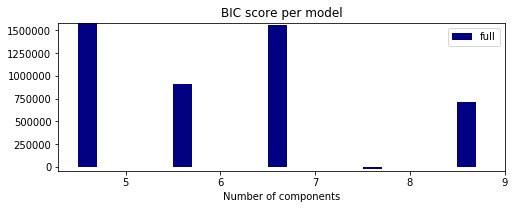

In [7]:
n_components_range = range(5, 10)
best_gmm, bic, cv_types = cl.getBestGMMUsingBIC(Xnorm, n_components_range, ['full'], 0.1)
bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue', 'darkorange', 'gold', 'tomato', 
                              'crimson', 'darkslategray', 'springgreen', 'chocolate'])
dp.plotBICScores(bic, cv_types, color_iter, n_components_range)

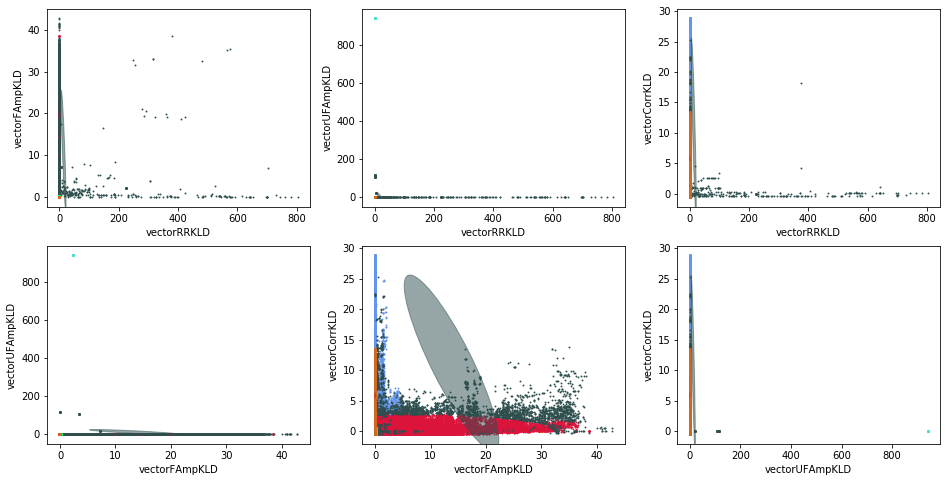

In [5]:
gmm = GaussianMixture(n_components=10, covariance_type='full').fit(Xnorm)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue', 'darkorange', 'gold', 'tomato', 
                              'crimson', 'darkslategray', 'springgreen', 'chocolate'])
dp.printPCAGMM(gmm, Xnorm, ['vectorRRKLD', 'vectorFAmpKLD', 'vectorUFAmpKLD', 'vectorCorrKLD'], color_iter)

In [6]:
print(gmm.weights_)
print(gmm.means_)
print(gmm.covariances_)

[6.84809628e-01 1.09837672e-06 7.01757520e-03 1.77505210e-01
 4.24768789e-04 2.66346224e-02 8.73782626e-03 1.75474096e-04
 5.91019160e-02 3.55918808e-02]
[[-2.41978928e-03 -9.48492414e-02 -7.53404275e-03 -2.15340193e-01]
 [-2.41965839e-03  2.30531491e+00  9.41246354e+02  1.90093986e-02]
 [-2.41941899e-03  5.75524293e-01  4.59591579e-02  3.68562970e+00]
 [-2.41978887e-03 -9.55221006e-02 -7.05050440e-03  2.87531771e-01]
 [-2.41978716e-03  2.99511722e+01  4.64437612e-03  1.90093986e-02]
 [-2.41978924e-03  6.84944851e-01  6.08383570e-02 -1.29441745e-01]
 [-2.41978937e-03  5.82219747e+00  3.96154835e-01 -7.09544205e-02]
 [ 1.37874201e+01  1.11793015e+01  2.06651690e+00  4.20802009e+00]
 [-2.41978424e-03 -4.46918796e-02 -3.95532406e-03 -2.56476061e-01]
 [-2.41904132e-03 -9.24704019e-02 -4.44604700e-03  2.50180143e+00]]
[[[ 1.00000000e-06 -7.57197025e-13 -1.41386801e-13 -7.70253961e-11]
  [-7.57197025e-13  4.85948556e-06  2.72179188e-07 -6.69541926e-06]
  [-1.41386801e-13  2.72179188e-07  1.0

In [20]:
importlib.reload(cl)

<module 'clustering' from '/homes/v18porti/Documents/code/imt_stg/clustering.py'>


------------- shape: (26428173, 4) -----------------
 
after soft removal (vectorCorrKLD && vectorFAmpKLD) shape : (25944205, 4) && 98.17
after hard removal (vectorUFAmpKLD && vectorRRKLD) shape : (25940107, 4) && 98.15


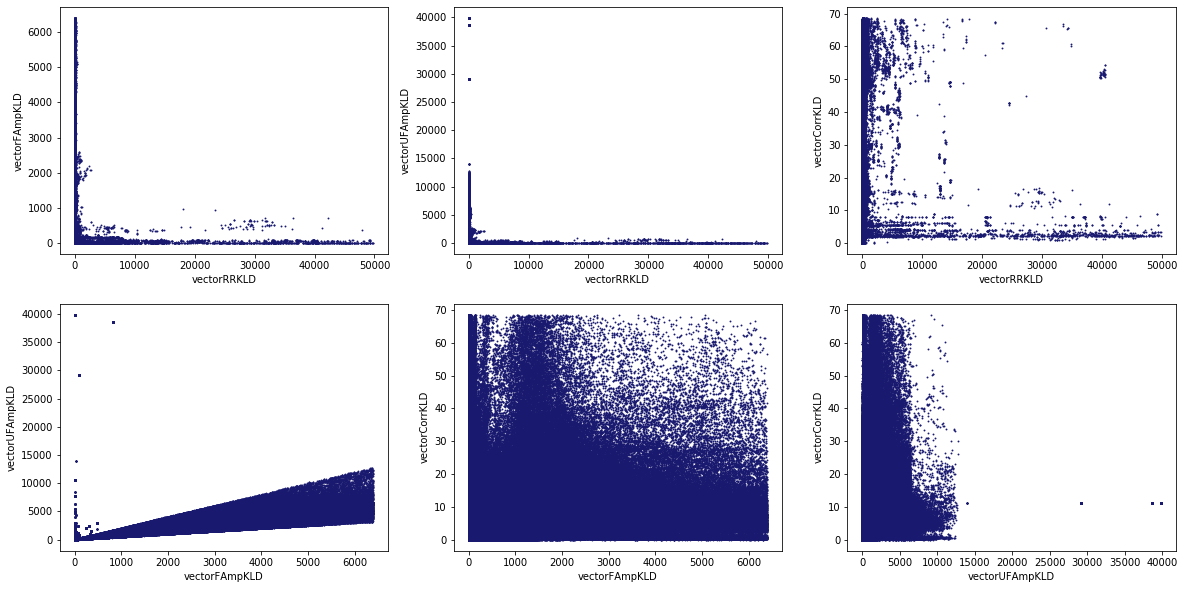

10901

In [23]:
df_DIV, indexes = hp.getRandomRows(df_ALL, 0.22)
printPCA = True
print(f'\n------------- shape: { df_DIV.shape } -----------------\n ')

df_DIV = cl.cleanData(df_DIV, 'mean')
#df_nout, Xnorm, Xpca, dfPca, titPca, pca, std, indexes2 = cl.runOutNormPCAV2(df_DIV, indexes, threshold=20, threshold_hard=0.01, cols_hard=[0,2])
df_nout, Xnorm, std, indexes2 = cl.runOutNorm(df_DIV, [], 
                                                threshold=20, threshold_hard=0.01, cols_hard=[0,2])

if printPCA: dp.printPCAScatter(df_nout, ['vectorRRKLD', 'vectorFAmpKLD', 'vectorUFAmpKLD', 'vectorCorrKLD'])
del df_nout; gc.collect()

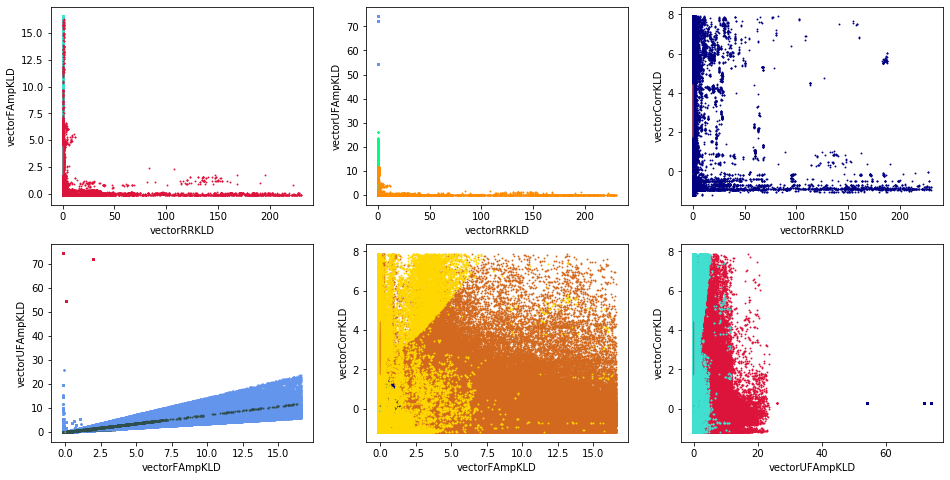

In [24]:
gmm = GaussianMixture(n_components=7, covariance_type='full').fit(Xnorm)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue', 'darkorange', 'gold', 'tomato', 
                              'crimson', 'darkslategray', 'springgreen', 'chocolate'])
dp.printPCAGMM(gmm, Xnorm, ['vectorRRKLD', 'vectorFAmpKLD', 'vectorUFAmpKLD', 'vectorCorrKLD'], color_iter)

In [4]:
df_DIV, indexes = hp.getRandomRows(df_ALL, 0.15)
printPCA = False
print(f'\n------------- shape: { df_DIV.shape } -----------------\n ')

df_DIV = cl.cleanData(df_DIV, 'mean')
#df_nout, Xnorm, Xpca, dfPca, titPca, pca, std, indexes2 = cl.runOutNormPCAV2(df_DIV, indexes, threshold=20, threshold_hard=0.01, cols_hard=[0,2])
df_nout, Xnorm, std, indexes2 = cl.runOutNorm(df_DIV, [], v2=False)

if printPCA: dp.printPCAScatter(df_nout, ['vectorRRKLD', 'vectorFAmpKLD', 'vectorUFAmpKLD', 'vectorCorrKLD'])
del df_nout; gc.collect()


------------- shape: (18019209, 4) -----------------
 
after soft removal (vectorCorrKLD && vectorFAmpKLD) shape : (18003390, 4) && 99.91
after hard removal (vectorUFAmpKLD && vectorRRKLD) shape : (17989516, 4) && 99.84


0

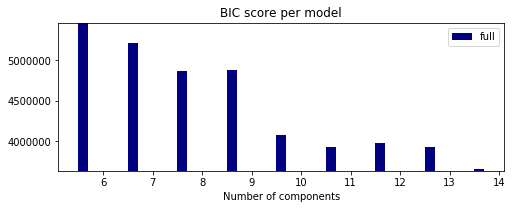

In [6]:
n_components_range = range(6, 15)
best_gmm, bic, cv_types = cl.getBestGMMUsingBIC(Xnorm, n_components_range, ['full'], 0.1)
bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue', 'darkorange', 'gold', 'tomato', 
                              'crimson', 'darkslategray', 'springgreen', 'chocolate'])
dp.plotBICScores(bic, cv_types, color_iter, n_components_range)

In [7]:
bic

array([5461889.5071978 , 5208293.53174798, 4869949.51205734,
       4876336.025821  , 4074910.97422956, 3921752.28108296,
       3982891.23440093, 3928806.71391831, 3652337.65565966])

In [6]:
df_DIV, indexes = hp.getRandomRows(df_ALL, 0.16)
printPCA = False
print(f'\n------------- shape: { df_DIV.shape } -----------------\n ')

df_DIV = cl.cleanData(df_DIV, 'mean')
#df_nout, Xnorm, Xpca, dfPca, titPca, pca, std, indexes2 = cl.runOutNormPCAV2(df_DIV, indexes, threshold=20, threshold_hard=0.01, cols_hard=[0,2])
df_nout, Xnorm, std, indexes2 = cl.runOutNorm(df_DIV, indexes)

if printPCA: dp.printPCAScatter(df_nout, ['vectorRRKLD', 'vectorFAmpKLD', 'vectorUFAmpKLD', 'vectorCorrKLD'])
del df_nout; gc.collect()


------------- shape: (19220490, 4) -----------------
 
bandwidth: 57284034075836.71
number of estimated clusters : 1069
shapes: (19220490,), (19220490, 4)
shapes: (19218653,), (19218653, 4)
tomain [ True  True  True ...  True  True  True]
after hard removal (vectorUFAmpKLD && vectorRRKLD) shape : (19202262, 4) && 99.91
after soft removal (vectorCorrKLD && vectorFAmpKLD) shape : (19218653, 4) && 99.99


0

gmm weights: [9.55053479e-01 1.30192995e-06 2.92075394e-02 2.23345182e-05
 2.40490854e-03 1.33104365e-02]
bic value: 1321129.6496524524
gmm weights: [9.53014085e-01 1.30192995e-06 2.88057546e-02 2.33282731e-05
 2.65664282e-03 1.30465694e-02 2.45231795e-03]
bic value: 824331.480537333
gmm weights: [9.53012409e-01 1.30192995e-06 9.91685544e-06 2.44367926e-03
 2.77025352e-03 2.88095457e-02 1.66164350e-05 1.29362771e-02]
bic value: 817251.3789420094
gmm weights: [9.46972456e-01 1.30192995e-06 1.56986232e-05 1.87290172e-03
 1.10509605e-02 1.37216637e-02 2.52820951e-02 1.07536089e-03
 7.56135318e-06]
bic value: 164605.1029987608
gmm weights: [9.44603038e-01 1.30192995e-06 1.42634482e-05 1.07205063e-02
 1.60975469e-03 1.40019874e-03 1.09525106e-03 2.58357767e-02
 8.74699443e-06 1.47111622e-02]
bic value: -1098438.1506748644
gmm weights: [9.04295786e-01 4.85107115e-06 1.30192995e-06 4.00094904e-03
 7.83137219e-03 1.08897977e-02 1.08234711e-02 5.79204109e-04
 1.02236407e-03 6.04627828e-02 8.811

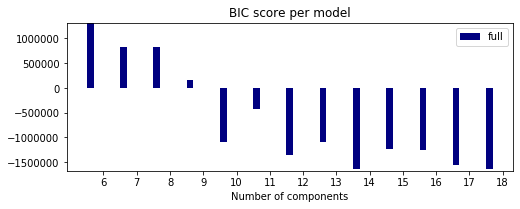

In [7]:
n_components_range = range(6, 19)
best_gmm, bic, cv_types = cl.getBestGMMUsingBIC(Xnorm, n_components_range, ['full'], 0.1)
bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue', 'darkorange', 'gold', 'tomato', 
                              'crimson', 'darkslategray', 'springgreen', 'chocolate'])
dp.plotBICScores(bic, cv_types, color_iter, n_components_range)

In [4]:
df_DIV, indexes = hp.getRandomRows(df_ALL, 0.16)
printPCA = False
print(f'\n------------- shape: { df_DIV.shape } -----------------\n ')

df_DIV = cl.cleanData(df_DIV, 'mean')
#df_nout, Xnorm, Xpca, dfPca, titPca, pca, std, indexes2 = cl.runOutNormPCAV2(df_DIV, indexes, threshold=20, threshold_hard=0.01, cols_hard=[0,2])
df_nout, Xnorm, std, indexes2 = cl.runOutNorm(df_DIV, indexes)

if printPCA: dp.printPCAScatter(df_nout, ['vectorRRKLD', 'vectorFAmpKLD', 'vectorUFAmpKLD', 'vectorCorrKLD'])
del df_nout; gc.collect()


------------- shape: (19220490, 4) -----------------
 
bandwidth: 950078131083974.9
number of estimated clusters : 695
shapes: (19220490,), (19220490, 4)
shapes: (19218632,), (19218632, 4)
tomain [ True  True  True ...  True  True  True]
after hard removal (vectorUFAmpKLD && vectorRRKLD) shape : (19202281, 4) && 99.91
after soft removal (vectorCorrKLD && vectorFAmpKLD) shape : (19218632, 4) && 99.99


0

gmm weights: [9.53640232e-01 2.87603602e-02 7.81157197e-07 1.48163290e-02
 1.88216924e-04 2.59408085e-03]
bic value: 1674454.860961193
gmm weights: [9.52982291e-01 7.81157197e-07 2.48615493e-03 2.53532840e-03
 2.18092587e-05 2.89147504e-02 1.30588851e-02]
bic value: 1101710.2746134964
gmm weights: [9.48612367e-01 7.81157197e-07 1.99641049e-05 1.16295172e-02
 1.83018935e-03 1.36643200e-02 1.06494291e-03 2.31779180e-02]
bic value: 470552.2774598379
gmm weights: [9.50830847e-01 1.06107625e-05 7.81157197e-07 1.76679702e-03
 2.42511403e-03 7.18301358e-04 1.09786407e-05 2.88929946e-02
 1.53435756e-02]
bic value: -265685.2823031161
gmm weights: [3.23669525e-02 7.81157197e-07 1.00562712e-05 2.06105741e-03
 8.18225428e-03 1.34521960e-02 9.33583638e-01 1.30952596e-05
 1.09376301e-03 9.23620580e-03]
bic value: 215869.09800702462
gmm weights: [3.46415331e-02 7.81157197e-07 1.03295028e-05 9.30027854e-01
 1.55429961e-03 8.13642899e-03 1.60158016e-02 2.55683955e-06
 1.07031617e-03 8.53858870e-03 1.51

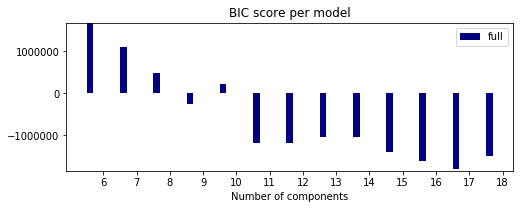

In [5]:
n_components_range = range(6, 19)
best_gmm, bic, cv_types = cl.getBestGMMUsingBIC(Xnorm, n_components_range, ['full'], 0.1)
bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue', 'darkorange', 'gold', 'tomato', 
                              'crimson', 'darkslategray', 'springgreen', 'chocolate'])
dp.plotBICScores(bic, cv_types, color_iter, n_components_range)

In [ ]:
bic

In [ ]:
best_gmm.weights_

In [16]:
print(hp.getRepresentativeness(best_gmm, Xnorm, best_gmm.predict(Xnorm)))

{'>50': 1, '>30': 0, '>15': 0, '>05': 0, '<05': 12}
[{'group': 0, 'qty': 354373, 'representativeness': 0.019685207111767335}, {'group': 1, 'qty': 20, 'representativeness': 1.11098797661037e-06}, {'group': 2, 'qty': 755, 'representativeness': 4.193979611704147e-05}, {'group': 3, 'qty': 11253, 'representativeness': 0.0006250973850398247}, {'group': 4, 'qty': 137263, 'representativeness': 0.007624877131673462}, {'group': 5, 'qty': 17065077, 'representativeness': 0.9479547683465083}, {'group': 6, 'qty': 3032, 'representativeness': 0.0001684257772541321}, {'group': 7, 'qty': 17613, 'representativeness': 0.0009783915616019224}, {'group': 8, 'qty': 7741, 'representativeness': 0.0004300078963470438}, {'group': 9, 'qty': 215663, 'representativeness': 0.011979949999986113}, {'group': 10, 'qty': 68087, 'representativeness': 0.0037821919181735136}, {'group': 11, 'qty': 121080, 'representativeness': 0.006725921210399181}, {'group': 12, 'qty': 38, 'representativeness': 2.110877155559703e-06}]



------------- shape: (26428173, 4) -----------------
 
bandwidth: 4689840799065345.0
number of estimated clusters : 437
shapes: (26428173,), (26428173, 4)
shapes: (26425609,), (26425609, 4)
tomain [ True  True  True ...  True  True  True]
after hard removal (vectorUFAmpKLD && vectorRRKLD) shape : (26402738, 4) && 99.9
after soft removal (vectorCorrKLD && vectorFAmpKLD) shape : (26425609, 4) && 99.99


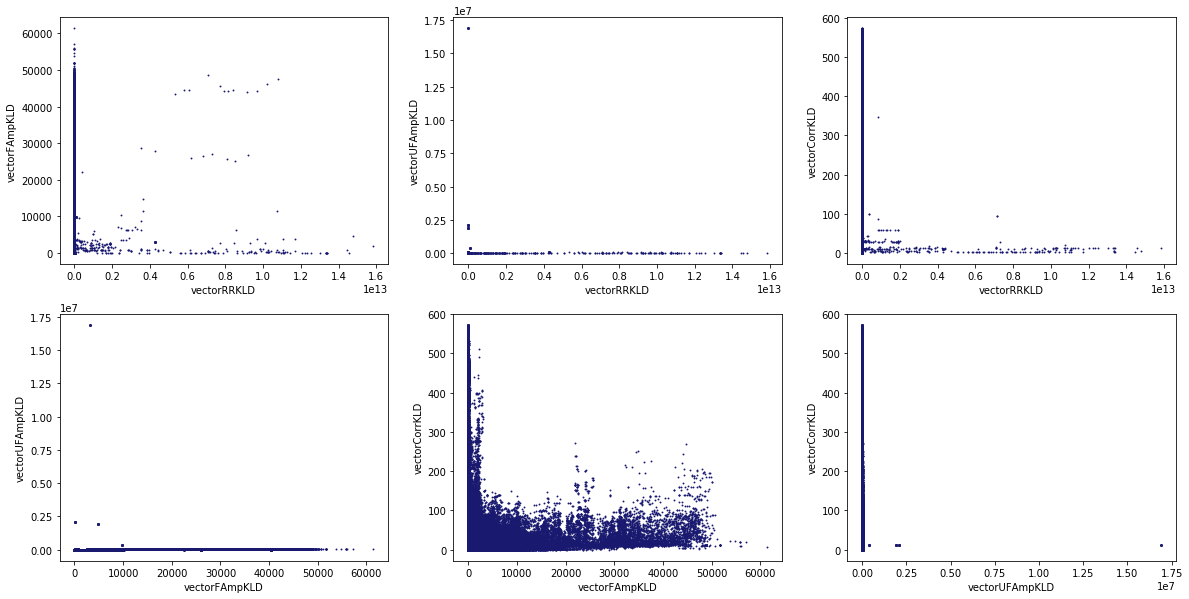

10931

In [18]:
df_DIV, indexes = hp.getRandomRows(df_ALL, 0.22)
printPCA = True
print(f'\n------------- shape: { df_DIV.shape } -----------------\n ')

df_DIV = cl.cleanData(df_DIV, 'mean')
#df_nout, Xnorm, Xpca, dfPca, titPca, pca, std, indexes2 = cl.runOutNormPCAV2(df_DIV, indexes, threshold=20, threshold_hard=0.01, cols_hard=[0,2])
df_nout, Xnorm, std, indexes2 = cl.runOutNorm(df_DIV, indexes, 
                                                threshold=20, threshold_hard=0.01, cols_hard=[0,2])

if printPCA: dp.printPCAScatter(df_nout, ['vectorRRKLD', 'vectorFAmpKLD', 'vectorUFAmpKLD', 'vectorCorrKLD'])
del df_nout; gc.collect()

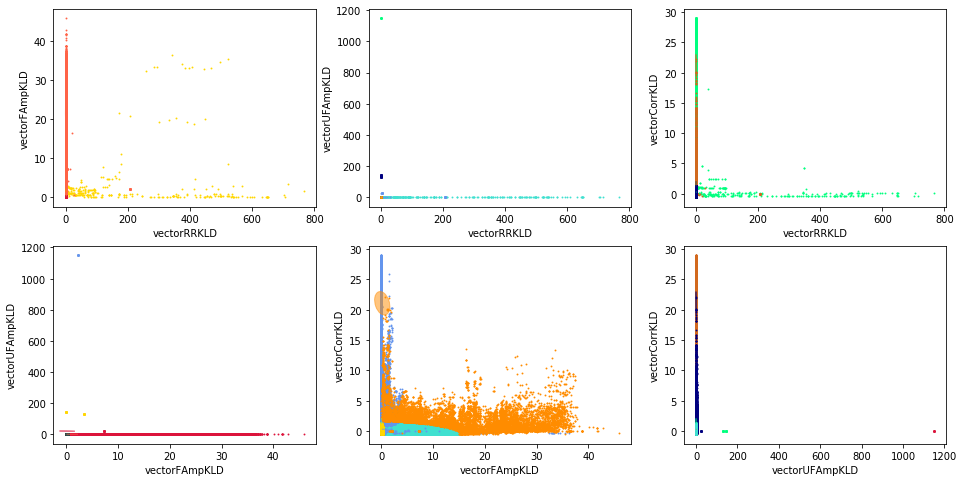

In [19]:
gmm = GaussianMixture(n_components=7, covariance_type='full').fit(Xnorm)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue', 'darkorange', 'gold', 'tomato', 
                              'crimson', 'darkslategray', 'springgreen', 'chocolate'])
dp.printPCAGMM(gmm, Xnorm, ['vectorRRKLD', 'vectorFAmpKLD', 'vectorUFAmpKLD', 'vectorCorrKLD'], color_iter)

<module 'clustering' from '/homes/v18porti/Documents/code/imt_stg/clustering.py'>


------------- shape: (26428173, 4) -----------------
 
bandwidth: 104469650224692.0
number of estimated clusters : 1404
shapes: (26428173,), (26428173, 4)
shapes: (26425522,), (26425522, 4)
tomain [ True  True  True ...  True  True  True]
after hard removal (vectorUFAmpKLD && vectorRRKLD) shape : (26403503, 4) && 99.91
after soft removal (vectorCorrKLD && vectorFAmpKLD) shape : (26425522, 4) && 99.99


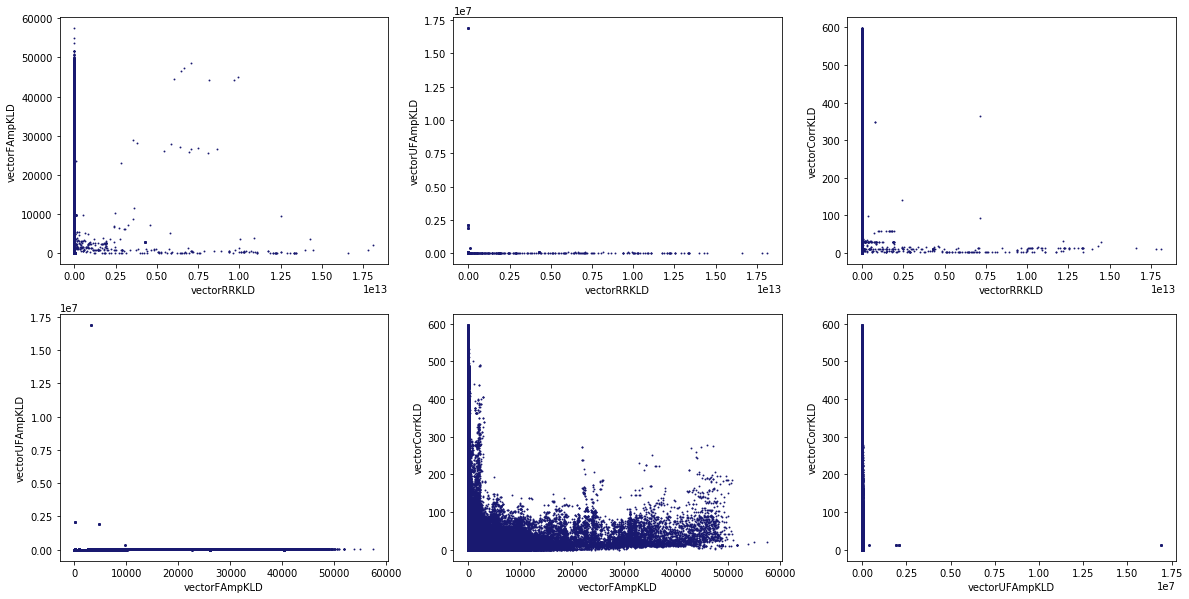

In [4]:
df_DIV, indexes = hp.getRandomRows(df_ALL, 0.22)
#del df_ALL; gc.collect()
printPCA = True
print(f'\n------------- shape: { df_DIV.shape } -----------------\n ')

df_DIV = cl.cleanData(df_DIV, 'mean')
"""UFAMP_limit = 1e+6
threshold = 20
RRKLD_limit = pow(10, 4*(0+1)) * 2"""
#print(f'RRKLD_limit={RRKLD_limit}, UFAMP_limit={UFAMP_limit}, threshold={threshold}')

#df_nout, Xnorm, Xpca, dfPca, titPca, pca, std, indexes2 = cl.runOutNormPCAV2(df_DIV, indexes, threshold=20, threshold_hard=0.01, cols_hard=[0,2])
df_nout, Xnorm, std, indexes2 = cl.runOutNorm(df_DIV, indexes, 
                                                threshold=20, threshold_hard=0.01, cols_hard=[0,2])
#del df_nout, Xnorm ; gc.collect()
if printPCA: dp.printPCAScatter(df_nout, ['vectorRRKLD', 'vectorFAmpKLD', 'vectorUFAmpKLD', 'vectorCorrKLD'])
#del dfPca; gc.collect()
del df_nout; gc.collect()

In [7]:
print(indexes)
print(indexes2)
print(indexes.shape)
print(indexes2.shape)
print(Xpca.shape)

[63483449 30209146 85620806 ... 43797040  1616980 37528421]
[63483449 30209146 85620806 ... 43797040  1616980 37528421]
(12012806,)
(12001173,)
(12001173, 4)


In [5]:
del df_nout; gc.collect()

10936

In [6]:
gmm = GaussianMixture(n_components=7, covariance_type='full').fit(Xnorm)

In [15]:
print(gmm.weights_)
print(gmm.means_)
print(gmm.covariances_)

[8.22511808e-01 1.86259579e-04 9.08970298e-07 2.40198155e-02
 9.80123226e-02 1.44941919e-03 5.38194661e-02]
[[-2.51540022e-03 -9.51988034e-02 -8.01268722e-03 -1.52674593e-01]
 [ 1.34957465e+00  4.63275835e-01  2.38628009e+00  4.14340645e+00]
 [-2.51527837e-03  2.31555935e+00  1.03032221e+03  1.79239453e-02]
 [-2.51540035e-03  3.08658410e+00  1.97919547e-01  1.57155255e-02]
 [-2.51519314e-03 -9.14731070e-02 -6.16810387e-03  1.16233034e+00]
 [ 1.55917207e+00  1.62978033e-01  3.06391279e-02  1.45595768e+01]
 [-2.51539252e-03  2.37903385e-01  1.88719874e-02 -1.96921697e-01]]


In [16]:
print(gmm.covariances_)

[[[ 1.00000000e-06 -6.43142630e-13 -1.36424339e-13 -6.83146068e-11]
  [-6.43142630e-13  4.47371723e-06  2.29263736e-07 -3.77958805e-05]
  [-1.36424339e-13  2.29263736e-07  1.13948195e-06  5.74403721e-05]
  [-6.83146068e-11 -3.77958805e-05  5.74403721e-05  4.98845831e-02]]

 [[ 2.66389662e+02  2.13255288e+00  6.26220892e-01 -5.60083235e+00]
  [ 2.13255288e+00  8.42878740e-01  1.90295208e+00 -4.72383235e-01]
  [ 6.26220892e-01  1.90295208e+00  1.66853706e+02 -9.71124305e+00]
  [-5.60083235e+00 -4.72383235e-01 -9.71124305e+00  2.59962312e+01]]

 [[ 1.00000000e-06 -1.15555797e-33  2.95822839e-31  9.02779661e-36]
  [-1.15555797e-33  1.00000000e-06 -2.01948392e-28 -6.16297582e-33]
  [ 2.95822839e-31 -2.01948392e-28  1.00000000e-06  1.57772181e-30]
  [ 9.02779661e-36 -6.16297582e-33  1.57772181e-30  1.00000000e-06]]

 [[ 1.00000000e-06  1.66201825e-09 -2.57590971e-11  2.17636386e-11]
  [ 1.66201825e-09  3.10054515e+01  7.58810768e-01  1.02772587e-01]
  [-2.57590971e-11  7.58810768e-01  7.5535

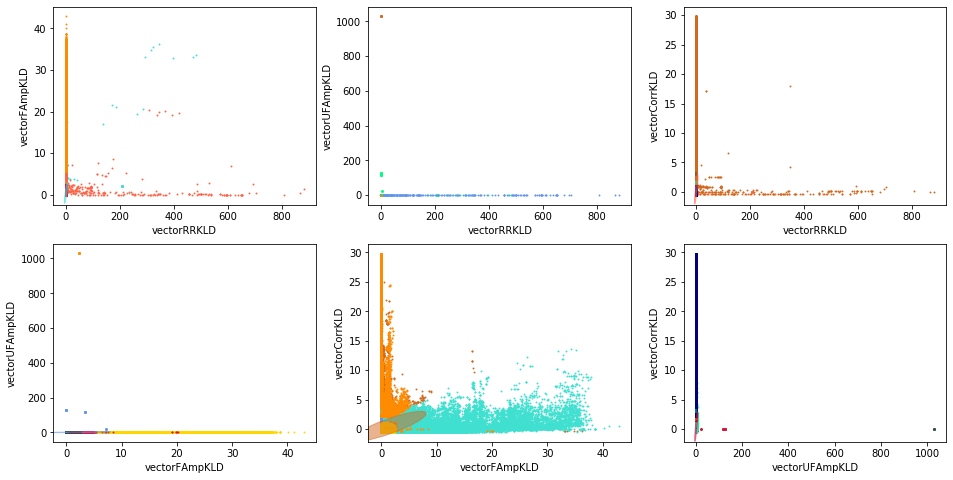

In [17]:
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue', 'darkorange', 'gold', 'tomato', 
                              'crimson', 'darkslategray', 'springgreen', 'chocolate'])
dp.printPCAGMM(gmm, Xnorm, ['vectorRRKLD', 'vectorFAmpKLD', 'vectorUFAmpKLD', 'vectorCorrKLD'], color_iter)

In [66]:
Y_ = gmm.predict(Xpca)

In [67]:
Y_

array([0, 0, 0, ..., 3, 0, 0])

In [21]:
zero = Xpca[Y_ == 0]

In [24]:
inv_zero=pca.inverse_transform(zero)

In [23]:
zero

array([[-0.09093843,  0.17881387, -0.09746518,  0.05130747],
       [-0.08496235,  0.13028617, -0.07043207,  0.05357886],
       [-0.10579386,  0.31588078, -0.17395453,  0.04308868],
       ...,
       [-0.08479262,  0.10737329, -0.05749236,  0.05701394],
       [-0.09394346,  0.22147621, -0.1213799 ,  0.04730721],
       [-0.073109  ,  0.0105569 , -0.00354345,  0.06175856]],
      dtype=float32)

In [25]:
inv_zero

array([[-0.00230409, -0.09398128, -0.00684494, -0.2085461 ],
       [-0.00230409, -0.09314433, -0.00673759, -0.15263646],
       [-0.00230408, -0.09363711, -0.00697211, -0.36642597],
       ...,
       [-0.00230409, -0.0962974 , -0.00691757, -0.12628707],
       [-0.00230409, -0.09170831, -0.00674373, -0.25765663],
       [-0.00230408, -0.09494754, -0.00672419, -0.01474757]])

In [68]:
XNNN = pca.inverse_transform(Xpca)

In [72]:
XNN2 = std.inverse_transform(XNNN)

In [73]:
dddd= pd.DataFrame(XNN2)
dddd.describe()

def getInitialForm(X, std, pca = None):
    XI = pca.inverse_transform(X) if pca is not None else X[:]
    return std.inverse_transform(XI)

,0,1,2,3
count,1.800206e+07,1.800206e+07,1.800206e+07,1.800206e+07
mean,4.825890e+07,1.326952e+02,1.483031e+02,1.083584e+01
std,2.017331e+10,1.335350e+03,1.805342e+04,1.944974e+01
min,-2.597112e+04,1.270837e-02,-1.020412e+01,-4.111326e-07
25%,-3.823238e+01,3.862604e+00,1.080996e+01,4.945517e+00
50%,1.340173e+01,5.340285e+00,1.411369e+01,7.261637e+00
75%,6.411966e+01,7.916837e+00,2.046550e+01,1.119640e+01
max,1.720138e+13,5.596787e+04,1.688185e+07,5.762541e+02


In [71]:
df_DIV.describe()

,vectorRRKLD,vectorFAmpKLD,vectorUFAmpKLD,vectorCorrKLD
count,1.801921e+07,1.801921e+07,1.801921e+07,1.801921e+07
mean,1.593837e+14,1.731477e+02,3.814990e+14,1.119641e+01
std,inf,3.107466e+03,inf,2.826981e+01
min,-1.201716e+01,1.271403e-02,-1.020411e+01,0.000000e+00
25%,8.483441e+00,3.861928e+00,1.081291e+01,4.947529e+00
50%,1.087412e+01,5.340919e+00,1.412069e+01,7.266261e+00
75%,1.527688e+01,7.922237e+00,2.049804e+01,1.119640e+01
max,3.347533e+19,8.780618e+05,2.250281e+20,1.754816e+04


In [75]:
a = np.array([10,20,30,40,50])

In [76]:
np.delete(a, [2,3], 0)

array([10, 20, 50])

In [41]:
f['main']

TypeError: 'FeatureUnion' object is not subscriptable

In [61]:
def normalize(df):
    num_attribs = list(df)
    pipeline = Pipeline([
            ('selector', hp.DataFrameSelector(num_attribs)), # to handle pandas data frame
            ('std_scaler', StandardScaler(copy=True))
        ])
    full_pipeline = FeatureUnion(transformer_list=[
        ("main", pipeline),
        ])
    return full_pipeline.fit_transform(df)

In [54]:
num_attribs = list(df_DIV)
sel = hp.DataFrameSelector(num_attribs)
nor = StandardScaler(copy=True)

/homes/v18porti/.local/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1545: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


array([[  13.481139 , 1700.0516   , 1720.9016   ,   20.84999  ],
       [  12.755416 ,    7.194039 ,   13.97451  ,    6.780471 ],
       [   7.0560927,    8.3114805,   16.179764 ,    7.868283 ],
       ...,
       [   8.317161 ,    4.1016865,   12.482639 ,    8.380953 ],
       [  10.677795 ,   10.228788 ,   16.053734 ,    5.8249464],
       [  25.895119 ,    5.9039474,   16.45508  ,   10.551133 ]],
      dtype=float32)

/homes/v18porti/.local/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1545: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


array([[-0.        ,  0.4914139 , -0.        ,  0.34449643],
       [-0.        , -0.05346065, -0.        , -0.1579644 ],
       [-0.        , -0.05310099, -0.        , -0.11911568],
       ...,
       [-0.        , -0.05445598, -0.        , -0.10080684],
       [-0.        , -0.05248387, -0.        , -0.19208877],
       [-0.        , -0.05387589, -0.        , -0.0233038 ]],
      dtype=float32)

In [ ]:
bayesian_estimators = [
    ("Finite mixture with a Dirichlet distribution prior=", BayesianGaussianMixture(
        weight_concentration_prior_type="dirichlet_distribution",
        #reg_covar=0, init_params='random',
        max_iter=100, #mean_precision_prior=.8,
        random_state=2)),
    ("Infinite mixture with a Dirichlet process prior=",
     BayesianGaussianMixture(
        weight_concentration_prior_type="dirichlet_process",
        #reg_covar=0, init_params='random',
        max_iter=100, #mean_precision_prior=.8,
        random_state=2))]
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue', 'darkorange', 'gold', 'tomato', 
                              'crimson', 'darkslategray', 'springgreen', 'chocolate'])

In [ ]:
df_DIV = hp.getRandomRows(df_ALL, 0.22)
del df_ALL; gc.collect()
printPCA = False
print(f'\n------------- shape: { df_DIV.shape } -----------------\n ')

df_DIV = cl.cleanData(df_DIV, 'mean')
UFAMP_limit = 1e+6
threshold = 20
RRKLD_limit = pow(10, 4*(0+1)) * 2
print(f'RRKLD_limit={RRKLD_limit}, UFAMP_limit={UFAMP_limit}, threshold={threshold}')

df_nout, Xnorm, Xpca, dfPca, titPca = cl.runOutNormPCA(df_DIV, threshold, UFAMP_limit, RRKLD_limit)
del df_nout, Xnorm ; gc.collect()
if printPCA: dp.printPCAScatter(dfPca, titPca)
del dfPca; gc.collect()

init_params = ['kmeans', 'random']
random_state = [1, 2]
bic = []
for comp in range(5, 10):
    for k, ip in enumerate(init_params):
        for j, rs in enumerate(random_state):
            
            print(f'\n -> GAUSSIAN MIXTURE (comp: {comp}, ranst: {rs}, initp: {ip} ) ----------------- \n')
            gmm = GaussianMixture(n_components=comp, covariance_type='full', random_state=rs, init_params=ip).fit(Xpca)
            dp.printPCAGMM(gmm, Xpca, titPca, color_iter)
            print(hp.getRepresentativeness(gmm, Xpca, gmm.predict(Xpca)))
            bic.append(gmm.bic(Xpca))
            del gmm; gc.collect()
    
            print(f'\n -> BAYESIAN MIXTURE (comp: {comp}, ranst: {rs}, initp: {ip} )----------------- \n')
            bgm = BayesianGaussianMixture(n_components=comp, random_state=rs, init_params=ip).fit(Xpca)
            dp.printPCAGMM(bgm, Xpca, titPca, color_iter)
            print(hp.getRepresentativeness(bgm, Xpca, bgm.predict(Xpca)))
            del bgm; gc.collect()
            
print(np.array(bic)); 
del Xpca, bic, titPca; gc.collect();
del df_DIV; gc.collect()


------------- shape: (26428173, 4) -----------------
 
RRKLD_limit=20000, UFAMP_limit=1000000.0, threshold=20
after soft removal (vectorCorrKLD && vectorFAmpKLD) shape : (26406068, 4) && 99.92
after hard removal (vectorUFAmpKLD && vectorRRKLD) shape : (26380278, 4) && 99.82
variance ratio: [0.40354221 0.335481   0.16434353 0.09663326]

 -> GAUSSIAN MIXTURE (comp: 5, ranst: 1, initp: kmeans ) ----------------- 



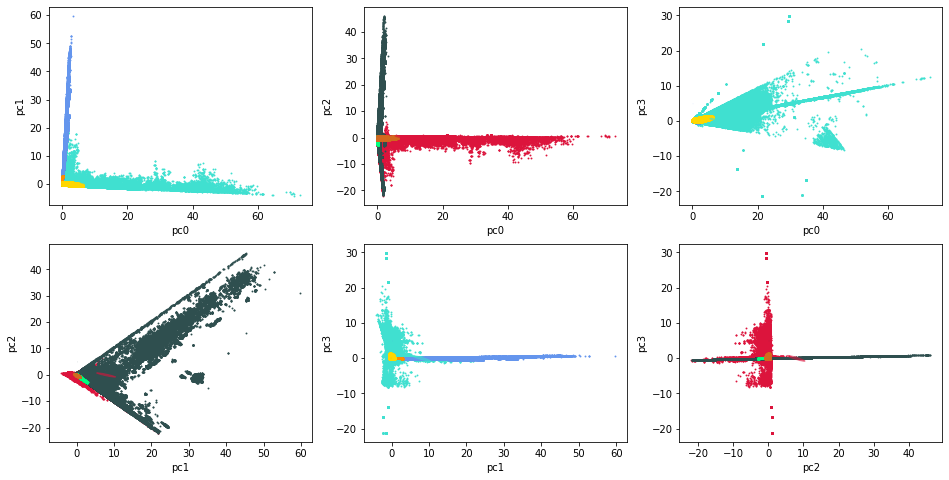

{'>50': 1, '>30': 0, '>15': 0, '>05': 2, '<05': 2}
[{'group': 0, 'qty': 20194418, 'representativeness': 0.7655119479787135}, {'group': 1, 'qty': 326913, 'representativeness': 0.012392325812487648}, {'group': 2, 'qty': 467235, 'representativeness': 0.01771152677011213}, {'group': 3, 'qty': 3831712, 'representativeness': 0.14524911375081037}, {'group': 4, 'qty': 1560000, 'representativeness': 0.05913508568787638}]

 -> BAYESIAN MIXTURE (comp: 5, ranst: 1, initp: kmeans )----------------- 



/homes/v18porti/.local/lib/python3.6/site-packages/sklearn/mixture/base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


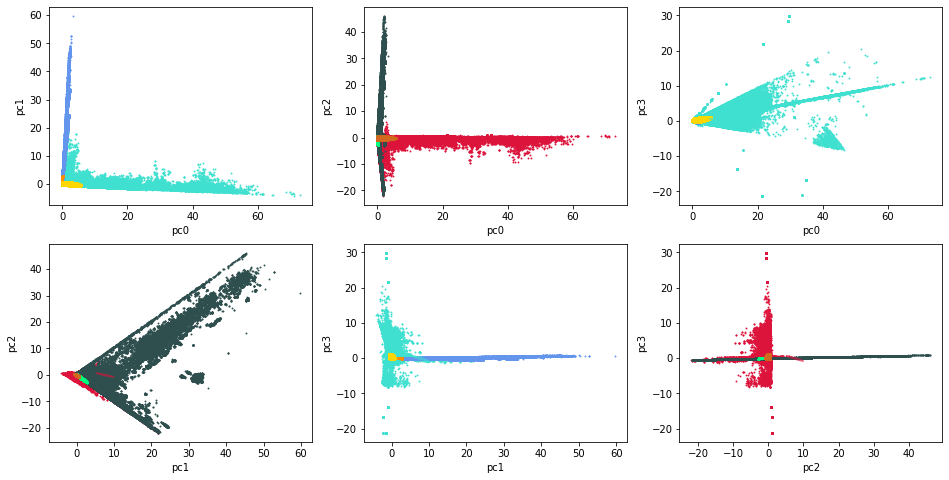

{'>50': 1, '>30': 0, '>15': 0, '>05': 2, '<05': 2}
[{'group': 0, 'qty': 20035400, 'representativeness': 0.7594840357633835}, {'group': 1, 'qty': 349678, 'representativeness': 0.01325528108536233}, {'group': 2, 'qty': 442153, 'representativeness': 0.016760740732148463}, {'group': 3, 'qty': 3937313, 'representativeness': 0.1492521420737113}, {'group': 4, 'qty': 1615734, 'representativeness': 0.06124780034539439}]

 -> GAUSSIAN MIXTURE (comp: 5, ranst: 2, initp: kmeans ) ----------------- 



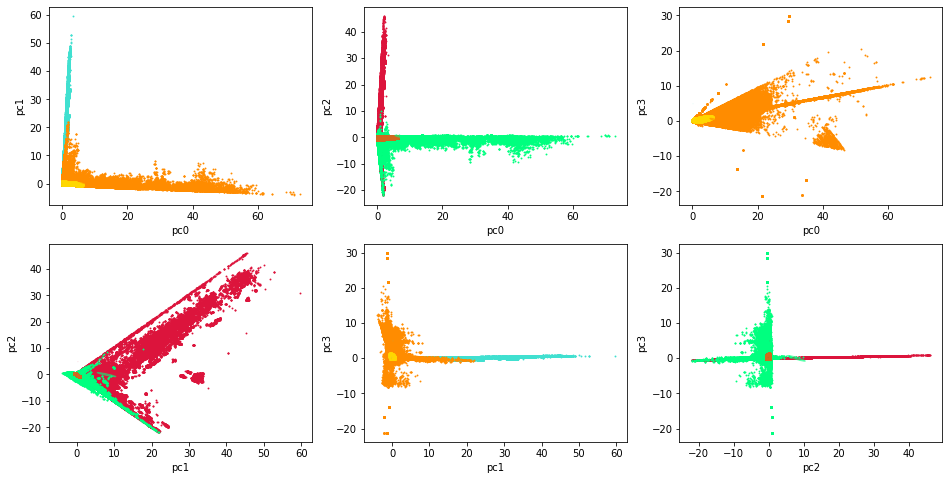

{'>50': 1, '>30': 0, '>15': 0, '>05': 2, '<05': 2}
[{'group': 0, 'qty': 20194418, 'representativeness': 0.7655119479787135}, {'group': 1, 'qty': 467235, 'representativeness': 0.01771152677011213}, {'group': 2, 'qty': 3831712, 'representativeness': 0.14524911375081037}, {'group': 3, 'qty': 326913, 'representativeness': 0.012392325812487648}, {'group': 4, 'qty': 1560000, 'representativeness': 0.05913508568787638}]

 -> BAYESIAN MIXTURE (comp: 5, ranst: 2, initp: kmeans )----------------- 



/homes/v18porti/.local/lib/python3.6/site-packages/sklearn/mixture/base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


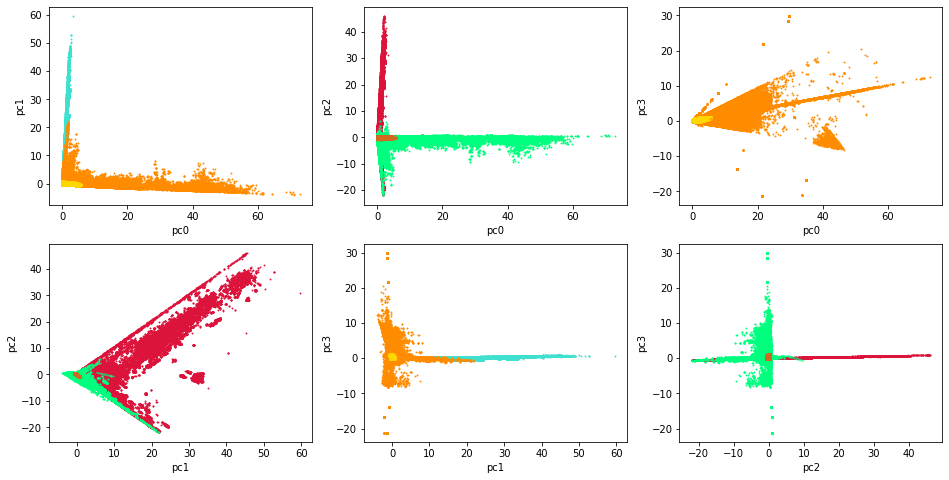

{'>50': 1, '>30': 0, '>15': 0, '>05': 2, '<05': 2}
[{'group': 0, 'qty': 20035400, 'representativeness': 0.7594840357633835}, {'group': 1, 'qty': 442153, 'representativeness': 0.016760740732148463}, {'group': 2, 'qty': 3937313, 'representativeness': 0.1492521420737113}, {'group': 3, 'qty': 349678, 'representativeness': 0.01325528108536233}, {'group': 4, 'qty': 1615734, 'representativeness': 0.06124780034539439}]

 -> GAUSSIAN MIXTURE (comp: 5, ranst: 1, initp: random ) ----------------- 



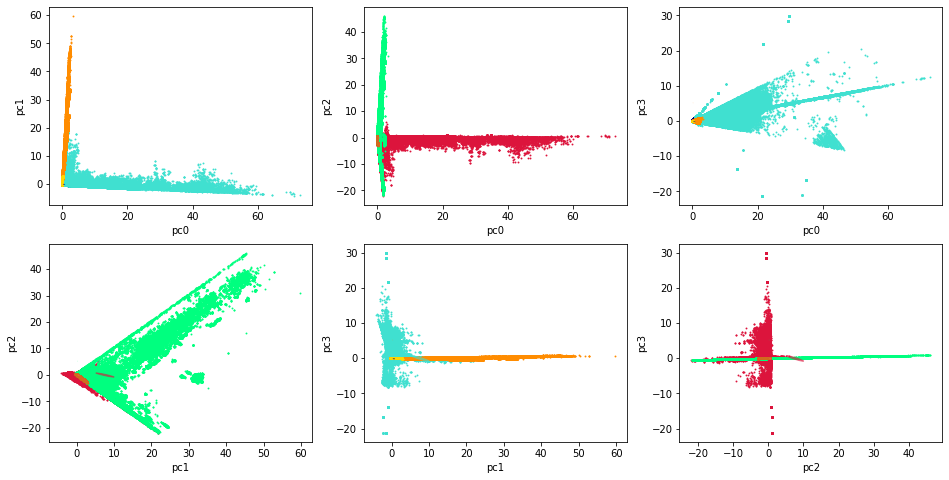

{'>50': 1, '>30': 0, '>15': 0, '>05': 2, '<05': 2}
[{'group': 0, 'qty': 1610309, 'representativeness': 0.061042154294204176}, {'group': 1, 'qty': 347452, 'representativeness': 0.013170899866938476}, {'group': 2, 'qty': 20072077, 'representativeness': 0.7608743546978542}, {'group': 3, 'qty': 444091, 'representativeness': 0.016834204703983786}, {'group': 4, 'qty': 3906349, 'representativeness': 0.14807838643701934}]

 -> BAYESIAN MIXTURE (comp: 5, ranst: 1, initp: random )----------------- 



/homes/v18porti/.local/lib/python3.6/site-packages/sklearn/mixture/base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


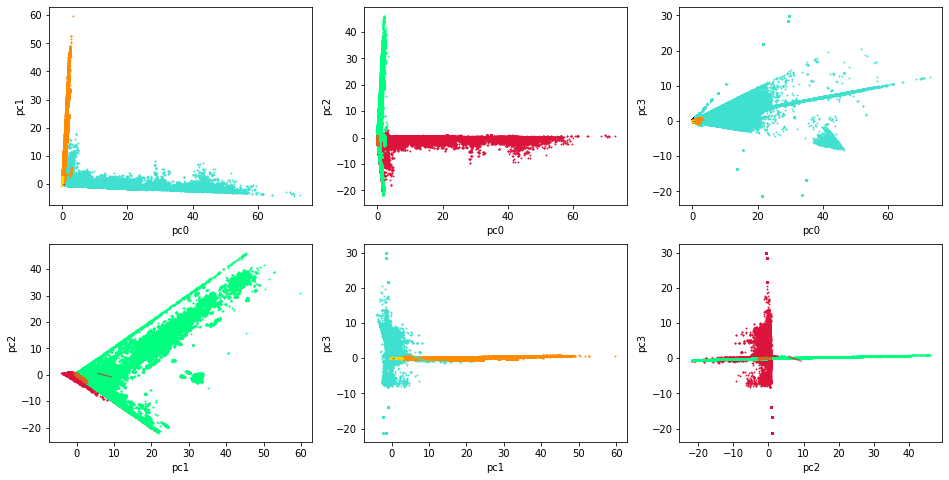

{'>50': 1, '>30': 0, '>15': 0, '>05': 2, '<05': 2}
[{'group': 0, 'qty': 1609484, 'representativeness': 0.06101088093158078}, {'group': 1, 'qty': 363091, 'representativeness': 0.013763729100959436}, {'group': 2, 'qty': 20109589, 'representativeness': 0.7622963260660104}, {'group': 3, 'qty': 393225, 'representativeness': 0.014906021839496915}, {'group': 4, 'qty': 3904889, 'representativeness': 0.1480230420619525}]

 -> GAUSSIAN MIXTURE (comp: 5, ranst: 2, initp: random ) ----------------- 



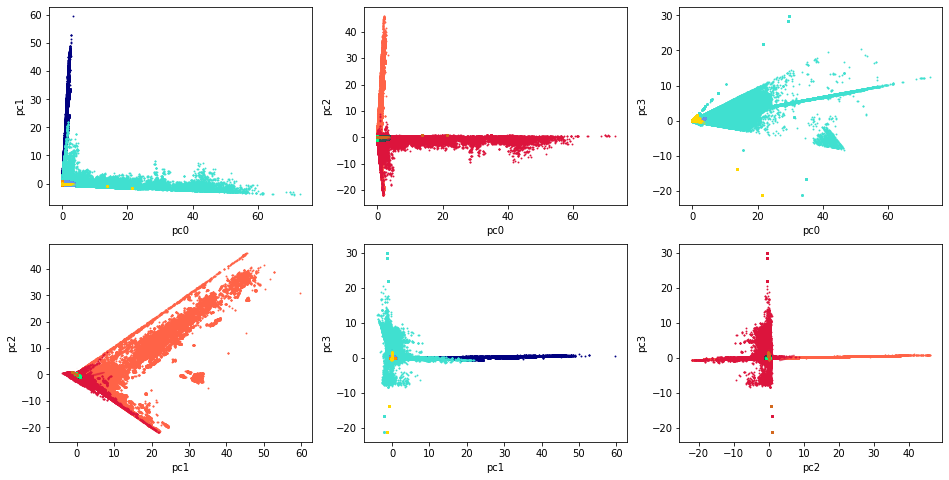

{'>50': 1, '>30': 0, '>15': 0, '>05': 1, '<05': 3}
[{'group': 0, 'qty': 1247826, 'representativeness': 0.04730147271382053}, {'group': 1, 'qty': 499336, 'representativeness': 0.018928382786565025}, {'group': 2, 'qty': 2332365, 'representativeness': 0.08841320777589987}, {'group': 3, 'qty': 22002674, 'representativeness': 0.8340577002259036}, {'group': 4, 'qty': 298077, 'representativeness': 0.011299236497810979}]

 -> BAYESIAN MIXTURE (comp: 5, ranst: 2, initp: random )----------------- 



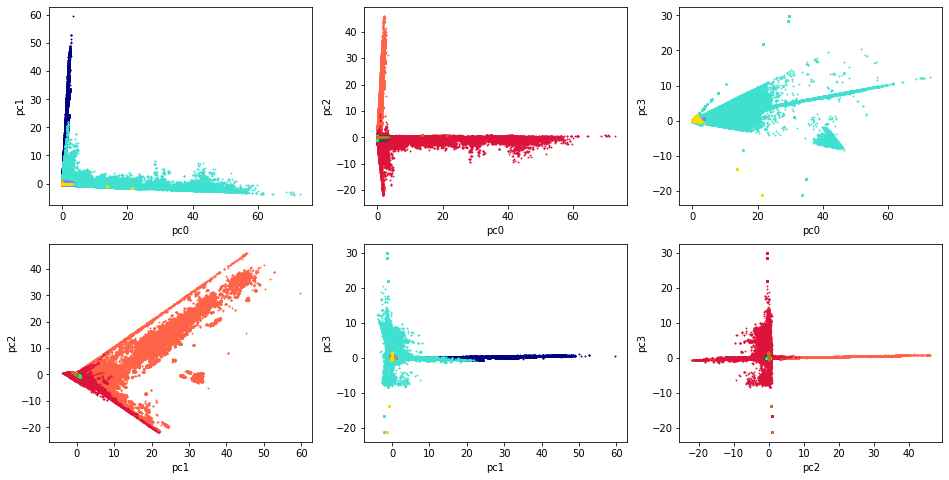

{'>50': 1, '>30': 0, '>15': 0, '>05': 1, '<05': 3}
[{'group': 0, 'qty': 1237449, 'representativeness': 0.04690811067267752}, {'group': 1, 'qty': 502119, 'representativeness': 0.01903387826314795}, {'group': 2, 'qty': 2323363, 'representativeness': 0.08807196800579585}, {'group': 3, 'qty': 22018619, 'representativeness': 0.8346621290344249}, {'group': 4, 'qty': 298728, 'representativeness': 0.011323914023953803}]

 -> GAUSSIAN MIXTURE (comp: 6, ranst: 1, initp: kmeans ) ----------------- 



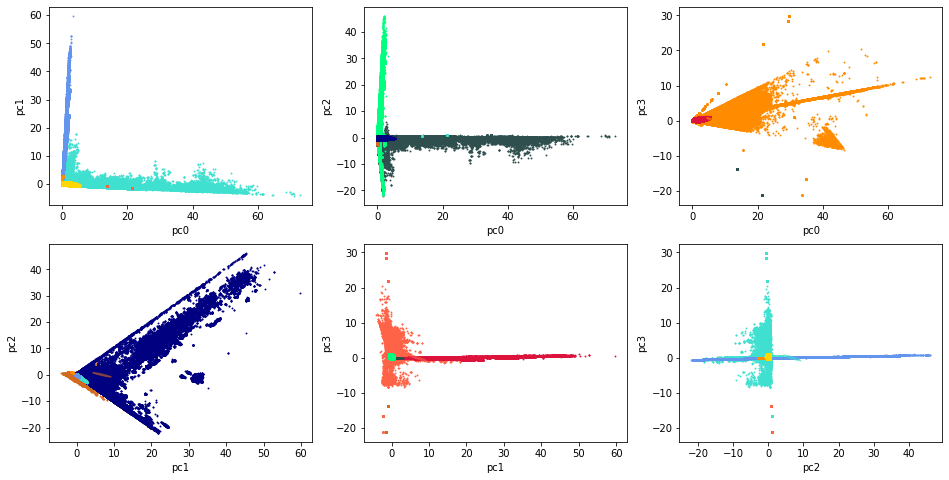

{'>50': 1, '>30': 0, '>15': 0, '>05': 2, '<05': 3}
[{'group': 0, 'qty': 20111391, 'representativeness': 0.7623646346714011}, {'group': 1, 'qty': 339292, 'representativeness': 0.01286157788026343}, {'group': 2, 'qty': 462596, 'representativeness': 0.017535675704403116}, {'group': 3, 'qty': 3879192, 'representativeness': 0.14704894315366956}, {'group': 4, 'qty': 1565720, 'representativeness': 0.05935191433539859}, {'group': 5, 'qty': 22087, 'representativeness': 0.000837254254864183}]

 -> BAYESIAN MIXTURE (comp: 6, ranst: 1, initp: kmeans )----------------- 



/homes/v18porti/.local/lib/python3.6/site-packages/sklearn/mixture/base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


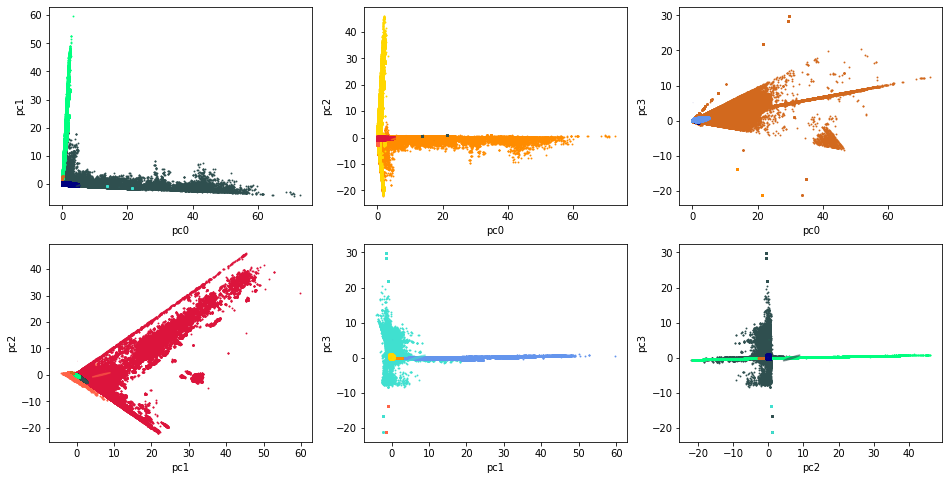

{'>50': 1, '>30': 0, '>15': 0, '>05': 2, '<05': 3}
[{'group': 0, 'qty': 20012978, 'representativeness': 0.758634082627939}, {'group': 1, 'qty': 352662, 'representativeness': 0.013368395890293499}, {'group': 2, 'qty': 442313, 'representativeness': 0.01676680586914209}, {'group': 3, 'qty': 3946740, 'representativeness': 0.14960949236395463}, {'group': 4, 'qty': 1603498, 'representativeness': 0.06078396899380666}, {'group': 5, 'qty': 22087, 'representativeness': 0.000837254254864183}]

 -> GAUSSIAN MIXTURE (comp: 6, ranst: 2, initp: kmeans ) ----------------- 



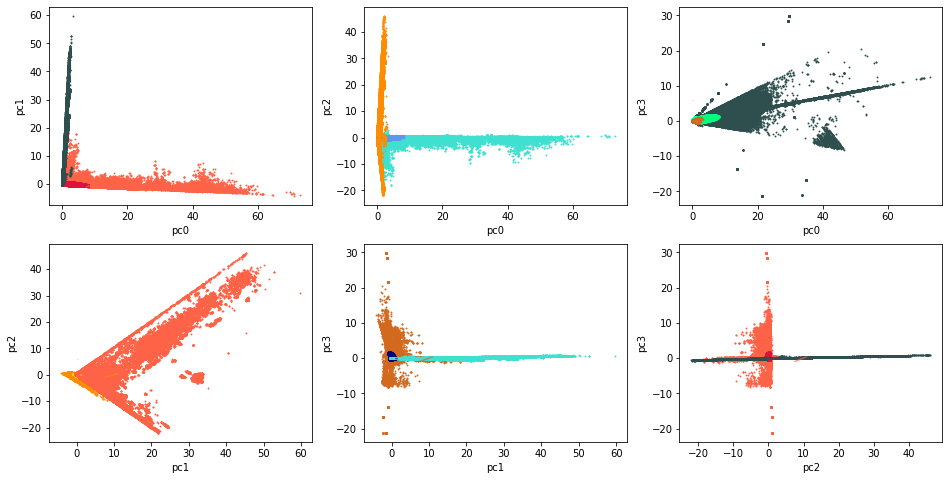

{'>50': 1, '>30': 0, '>15': 0, '>05': 2, '<05': 3}
[{'group': 0, 'qty': 19152543, 'representativeness': 0.7260174816959851}, {'group': 1, 'qty': 3331622, 'representativeness': 0.12629214900616287}, {'group': 2, 'qty': 2296122, 'representativeness': 0.08703934052552441}, {'group': 3, 'qty': 255368, 'representativeness': 0.009680261898680521}, {'group': 4, 'qty': 962089, 'representativeness': 0.03647000990664314}, {'group': 5, 'qty': 382534, 'representativeness': 0.014500756967003911}]

 -> BAYESIAN MIXTURE (comp: 6, ranst: 2, initp: kmeans )----------------- 



/homes/v18porti/.local/lib/python3.6/site-packages/sklearn/mixture/base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


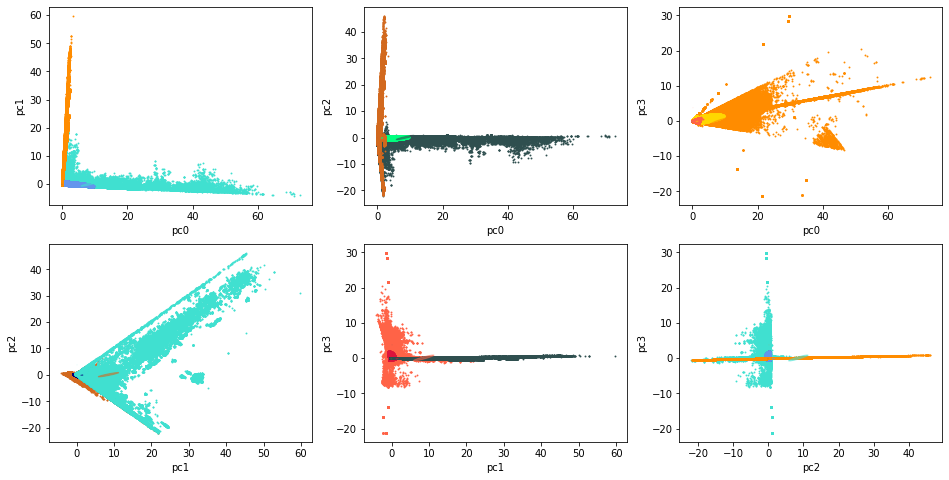

{'>50': 1, '>30': 0, '>15': 1, '>05': 1, '<05': 3}
[{'group': 0, 'qty': 15522017, 'representativeness': 0.5883947470151755}, {'group': 1, 'qty': 6738617, 'representativeness': 0.2554414703287054}, {'group': 2, 'qty': 2223745, 'representativeness': 0.08429573789935042}, {'group': 3, 'qty': 256577, 'representativeness': 0.009726091590088626}, {'group': 4, 'qty': 977825, 'representativeness': 0.03706651612996648}, {'group': 5, 'qty': 661497, 'representativeness': 0.025075437036713562}]

 -> GAUSSIAN MIXTURE (comp: 6, ranst: 1, initp: random ) ----------------- 



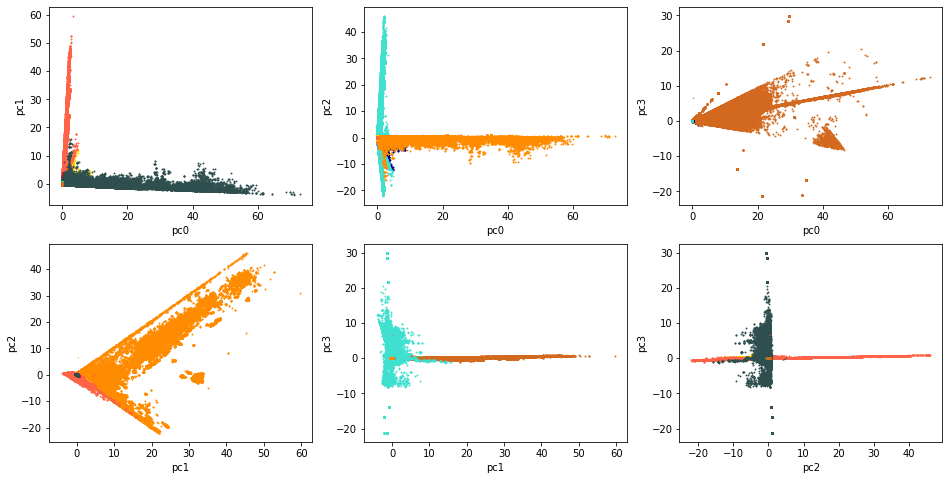

{'>50': 1, '>30': 0, '>15': 0, '>05': 2, '<05': 3}
[{'group': 0, 'qty': 961832, 'representativeness': 0.036460267780347125}, {'group': 1, 'qty': 327744, 'representativeness': 0.012423826617748305}, {'group': 2, 'qty': 3186944, 'representativeness': 0.12080782469388684}, {'group': 3, 'qty': 599722, 'representativeness': 0.02273372555057987}, {'group': 4, 'qty': 2172250, 'representativeness': 0.08234371146505734}, {'group': 5, 'qty': 19131786, 'representativeness': 0.7252306438923806}]

 -> BAYESIAN MIXTURE (comp: 6, ranst: 1, initp: random )----------------- 



/homes/v18porti/.local/lib/python3.6/site-packages/sklearn/mixture/base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


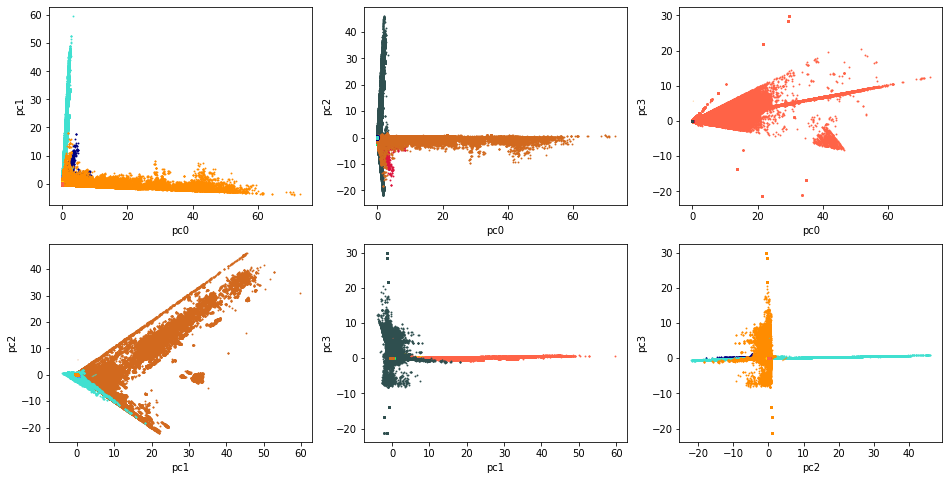

{'>50': 1, '>30': 0, '>15': 1, '>05': 1, '<05': 3}
[{'group': 0, 'qty': 897142, 'representativeness': 0.034008057079610764}, {'group': 1, 'qty': 402064, 'representativeness': 0.015241082751288671}, {'group': 2, 'qty': 4278138, 'representativeness': 0.1621718315477949}, {'group': 3, 'qty': 597823, 'representativeness': 0.02266173995588674}, {'group': 4, 'qty': 2141802, 'representativeness': 0.08118951589516987}, {'group': 5, 'qty': 18063309, 'representativeness': 0.6847277727702491}]

 -> GAUSSIAN MIXTURE (comp: 6, ranst: 2, initp: random ) ----------------- 



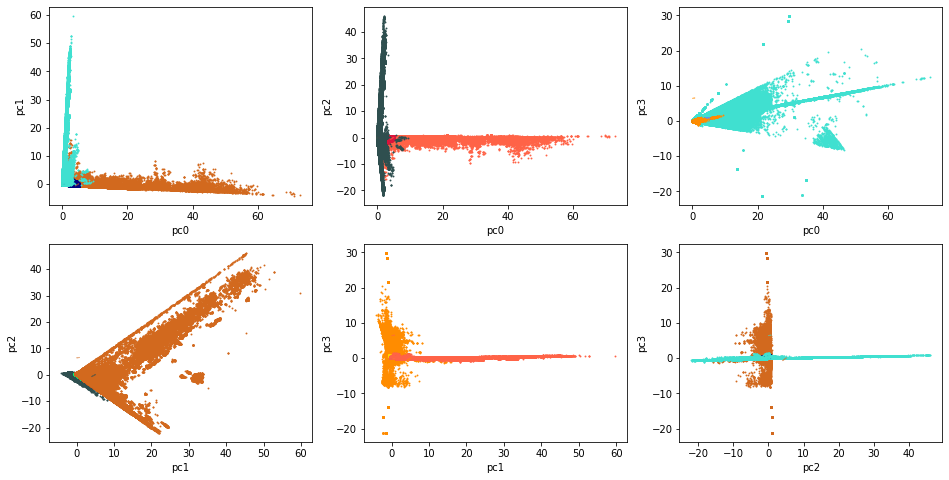

{'>50': 1, '>30': 0, '>15': 0, '>05': 2, '<05': 3}
[{'group': 0, 'qty': 19272095, 'representativeness': 0.7305493520576243}, {'group': 1, 'qty': 2865538, 'representativeness': 0.10862425331529865}, {'group': 2, 'qty': 2125481, 'representativeness': 0.08057083401471357}, {'group': 3, 'qty': 620264, 'representativeness': 0.02351241332634933}, {'group': 4, 'qty': 1178215, 'representativeness': 0.044662721143423886}, {'group': 5, 'qty': 318685, 'representativeness': 0.01208042614259031}]

 -> BAYESIAN MIXTURE (comp: 6, ranst: 2, initp: random )----------------- 



In [ ]:
df_DIV = hp.getRandomRows(df_ALL, 0.22)
del df_ALL; gc.collect()
printPCA = False
print(f'\n------------- shape: { df_DIV.shape } -----------------\n ')

df_DIV = cl.cleanData(df_DIV, 'mean')
UFAMP_limit = 1e+6
threshold = 20
RRKLD_limit = pow(10, 4*(0+1)) * 2
print(f'RRKLD_limit={RRKLD_limit}, UFAMP_limit={UFAMP_limit}, threshold={threshold}')

df_nout, Xnorm, Xpca, dfPca, titPca = cl.runOutNormPCA(df_DIV, threshold, UFAMP_limit, RRKLD_limit)
del df_nout, Xnorm ; gc.collect()
if printPCA: dp.printPCAScatter(dfPca, titPca)
del dfPca; gc.collect()

init_params = ['kmeans', 'random']
random_state = [1, 2]
bic = []
for comp in range(5, 10):
    for k, ip in enumerate(init_params):
        for j, rs in enumerate(random_state):
            
            print(f'\n -> GAUSSIAN MIXTURE (comp: {comp}, ranst: {rs}, initp: {ip} ) ----------------- \n')
            gmm = GaussianMixture(n_components=comp, covariance_type='full', random_state=rs, init_params=ip).fit(Xpca)
            dp.printPCAGMM(gmm, Xpca, titPca, color_iter)
            print(hp.getRepresentativeness(gmm, Xpca, gmm.predict(Xpca)))
            bic.append(gmm.bic(Xpca))
            del gmm; gc.collect()
    
            print(f'\n -> BAYESIAN MIXTURE (comp: {comp}, ranst: {rs}, initp: {ip} )----------------- \n')
            bgm = BayesianGaussianMixture(n_components=comp, random_state=rs, init_params=ip).fit(Xpca)
            dp.printPCAGMM(bgm, Xpca, titPca, color_iter)
            print(hp.getRepresentativeness(bgm, Xpca, bgm.predict(Xpca)))
            del bgm; gc.collect()
            
print(np.array(bic)); 
del Xpca, bic, titPca; gc.collect();
del df_DIV; gc.collect()